In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
def percent_scaling(series):
    return (series / 100)

def cpu_scaling(series):
    return (series * 4 / 100)

def single_cpu_scaling(series):
    return (((series - 100) * (-1)) / 100)

def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

In [3]:
disk_copy_df=pd.read_csv('../results/disk-copy.csv')
cpu_df = pd.read_csv('../results/numa-matrix.csv')


In [4]:
print(disk_copy_df.columns)
print(cpu_df.columns)

Index(['time', 'current', 'cpu_cycles_0', 'insns_0', 'cache_hit_0',
       'cache_miss_0', 'br_insns_0', 'br_miss_0', 'bus_cycles_0', 'freq_0',
       'cpu_cycles_1', 'insns_1', 'cache_hit_1', 'cache_miss_1', 'br_insns_1',
       'br_miss_1', 'bus_cycles_1', 'freq_1', 'cpu_cycles_2', 'insns_2',
       'cache_hit_2', 'cache_miss_2', 'br_insns_2', 'br_miss_2',
       'bus_cycles_2', 'freq_2', 'cpu_cycles_3', 'insns_3', 'cache_hit_3',
       'cache_miss_3', 'br_insns_3', 'br_miss_3', 'bus_cycles_3', 'freq_3',
       'rd_ios', 'wr_ios'],
      dtype='object')
Index(['time', 'current', 'cpu_cycles_0', 'insns_0', 'cache_hit_0',
       'cache_miss_0', 'br_insns_0', 'br_miss_0', 'bus_cycles_0', 'freq_0',
       'cpu_cycles_1', 'insns_1', 'cache_hit_1', 'cache_miss_1', 'br_insns_1',
       'br_miss_1', 'bus_cycles_1', 'freq_1', 'cpu_cycles_2', 'insns_2',
       'cache_hit_2', 'cache_miss_2', 'br_insns_2', 'br_miss_2',
       'bus_cycles_2', 'freq_2', 'cpu_cycles_3', 'insns_3', 'cache_hit_3',
  

## Preprocessing Functions

In [5]:
def preprocessing_rates(df):
    df['cache_hit_rate_0'] = (df['cache_hit_0'] - df['cache_miss_0']) / df['cache_hit_0']
    df['cache_hit_rate_1'] = (df['cache_hit_0'] - df['cache_miss_1']) / df['cache_hit_1']
    df['cache_hit_rate_2'] = (df['cache_hit_0'] - df['cache_miss_2']) / df['cache_hit_2']
    df['cache_hit_rate_3'] = (df['cache_hit_0'] - df['cache_miss_3']) / df['cache_hit_3']

    df['br_miss_rate_0'] = df['br_miss_0'] / df['br_insns_0']
    df['br_miss_rate_1'] = df['br_miss_1'] / df['br_insns_1']
    df['br_miss_rate_2'] = df['br_miss_2'] / df['br_insns_2']
    df['br_miss_rate_3'] = df['br_miss_3'] / df['br_insns_3']

    df['insns_0_norm'] = df['insns_0'] / (df['time'] - df['time'].shift())
    df['insns_1_norm'] = df['insns_1'] / (df['time'] - df['time'].shift())
    df['insns_2_norm'] = df['insns_2'] / (df['time'] - df['time'].shift())
    df['insns_3_norm'] = df['insns_3'] / (df['time'] - df['time'].shift())
    df = df.drop(index=0)

    return
    

In [6]:
def preprocessing_time(df):#cpu cycles over time
    df['cpu_cycle_0_per_time'] = df['cpu_cycles_0']  / (df['time'] - df['time'].shift())
    df['cpu_cycle_1_per_time'] = df['cpu_cycles_1']  / (df['time'] - df['time'].shift())
    df['cpu_cycle_2_per_time'] = df['cpu_cycles_2']  / (df['time'] - df['time'].shift())
    df['cpu_cycle_3_per_time'] = df['cpu_cycles_3']  / (df['time'] - df['time'].shift())
    #add bus_cycles_per_time
    df['bus_cycle_0_per_time'] = df['bus_cycles_0']  / (df['time'] - df['time'].shift())
    df['bus_cycle_1_per_time'] = df['bus_cycles_1']  / (df['time'] - df['time'].shift())
    df['bus_cycle_2_per_time'] = df['bus_cycles_2']  / (df['time'] - df['time'].shift())
    df['bus_cycle_3_per_time'] = df['bus_cycles_3']  / (df['time'] - df['time'].shift())
    #isn't clockspeed instructions/time?
    #branch miss rate over time
    # df['br_miss_0_per_time'] = df['br_miss_0']  / (df['time'] - df['time'].shift())
    # df['br_miss_1_per_time'] = df['br_miss_1']  / (df['time'] - df['time'].shift())
    # df['br_miss_2_per_time'] = df['br_miss_2']  / (df['time'] - df['time'].shift())
    # df['br_miss_3_per_time'] = df['br_miss_3']  / (df['time'] - df['time'].shift())
    #cache_miss_rate over time
    # df['cache_miss_0_per_time'] = df['cache_miss_0']  /  (df['time'] - df['time'].shift())
    # df['cache_miss_1_per_time'] = df['cache_miss_1']  /  (df['time'] - df['time'].shift())
    # df['cache_miss_2_per_time'] = df['cache_miss_2']  /  (df['time'] - df['time'].shift())
    # df['cache_miss_3_per_time'] = df['cache_miss_3']  /  (df['time'] - df['time'].shift())
    # #cache_hit_rate over time
    # df['cache_hit_0_per_time'] = df['cache_hit_0']  /  (df['time'] - df['time'].shift())
    # df['cache_hit_1_per_time'] = df['cache_hit_1']  /  (df['time'] - df['time'].shift())
    # df['cache_hit_2_per_time'] = df['cache_hit_2']  /  (df['time'] - df['time'].shift())
    # df['cache_hit_3_per_time'] = df['cache_hit_3']  /  (df['time'] - df['time'].shift())
    return

In [7]:
def preprocessing_filter_out_non_rates(df):
    return df.dropna().drop(columns=["cpu_cycles_0", "cpu_cycles_1","cpu_cycles_2", "cpu_cycles_3","cache_miss_0","cache_miss_1","cache_miss_2","cache_miss_3","cache_hit_0","cache_hit_1","cache_hit_2","cache_hit_3","bus_cycles_0", "bus_cycles_1","bus_cycles_2","bus_cycles_3","br_miss_0","br_miss_1","br_miss_2","br_miss_3","insns_0","insns_1","insns_2","insns_3"])



## Outliers Filter

In [8]:
def outlier_filter(df, column_name, lower_range, upper_range):
# calculate IQR for column A
    Q1 = df[column_name].quantile(lower_range)
    Q3 = df[column_name].quantile(upper_range)
    IQR = Q3 - Q1
    print(Q1, Q3)
    # identify outliers
    threshold = 0.5
    outliers = df[(df[column_name] < Q1 - threshold * IQR) | (df[column_name] > Q3 + threshold * IQR)]
    return outliers.index

In [9]:
preprocessing_rates(cpu_df)
preprocessing_time(cpu_df)
cpu_df_rates = preprocessing_filter_out_non_rates(cpu_df)

In [10]:
preprocessing_rates(disk_copy_df)
preprocessing_time(disk_copy_df)
disk_copy_df_rates = preprocessing_filter_out_non_rates(disk_copy_df)

In [11]:
cpu_df_rates.columns

Index(['time', 'current', 'br_insns_0', 'freq_0', 'br_insns_1', 'freq_1',
       'br_insns_2', 'freq_2', 'br_insns_3', 'freq_3', 'cache_hit_rate_0',
       'cache_hit_rate_1', 'cache_hit_rate_2', 'cache_hit_rate_3',
       'br_miss_rate_0', 'br_miss_rate_1', 'br_miss_rate_2', 'br_miss_rate_3',
       'insns_0_norm', 'insns_1_norm', 'insns_2_norm', 'insns_3_norm',
       'cpu_cycle_0_per_time', 'cpu_cycle_1_per_time', 'cpu_cycle_2_per_time',
       'cpu_cycle_3_per_time', 'bus_cycle_0_per_time', 'bus_cycle_1_per_time',
       'bus_cycle_2_per_time', 'bus_cycle_3_per_time'],
      dtype='object')

In [12]:
of_cpu_df = cpu_df_rates.drop(outlier_filter(cpu_df_rates, 'current', 0.25, 0.90))

1.984 4.328


In [13]:
outlier_filter(cpu_df_rates, 'current', 0.25, 0.75)

1.984 3.668


Index([28622, 28623, 28624, 28625, 28666, 28667, 28668, 28669, 28677, 28678,
       ...
       40868, 40869, 40878, 40879, 40880, 40881, 40882, 40883, 40884, 40885],
      dtype='int64', length=2627)

In [14]:
# of_cpu_df = cpu_df_rates.drop(outlier_filter(cpu_df_rates, 'br_insns_0', 0.25, 0.99))

In [15]:
# for col_name in cpu_df_rates.columns:
#     of_cpu_df = of_cpu_df.drop(outlier_filter(of_cpu_df, col_name, 0.25, 0.99))

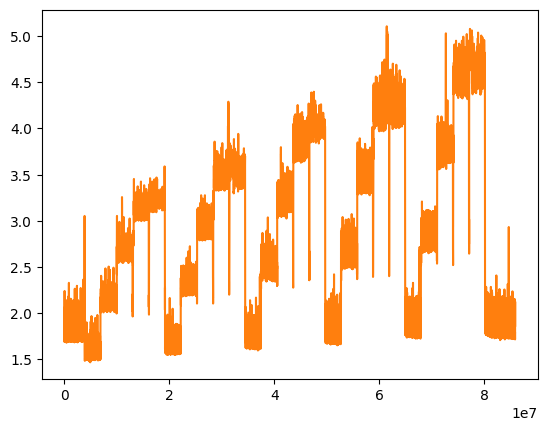

In [16]:
plt.plot(of_cpu_df.time, of_cpu_df['current'], 'tab:orange')


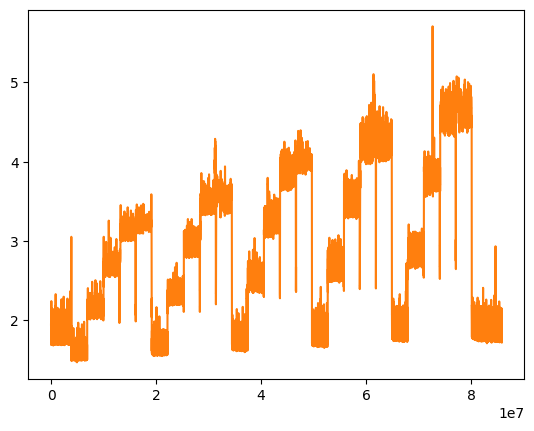

In [17]:
plt.plot(cpu_df_rates.time, cpu_df_rates['current'], 'tab:orange')


In [18]:
cpu_df_rates.columns

Index(['time', 'current', 'br_insns_0', 'freq_0', 'br_insns_1', 'freq_1',
       'br_insns_2', 'freq_2', 'br_insns_3', 'freq_3', 'cache_hit_rate_0',
       'cache_hit_rate_1', 'cache_hit_rate_2', 'cache_hit_rate_3',
       'br_miss_rate_0', 'br_miss_rate_1', 'br_miss_rate_2', 'br_miss_rate_3',
       'insns_0_norm', 'insns_1_norm', 'insns_2_norm', 'insns_3_norm',
       'cpu_cycle_0_per_time', 'cpu_cycle_1_per_time', 'cpu_cycle_2_per_time',
       'cpu_cycle_3_per_time', 'bus_cycle_0_per_time', 'bus_cycle_1_per_time',
       'bus_cycle_2_per_time', 'bus_cycle_3_per_time'],
      dtype='object')

## Min Filter

In [19]:
def min_filter(df, window_size, column_name):
    filtered_df = df.copy()

    # for column in df.columns:
    filtered_df[column_name] = df[column_name].rolling(window=window_size, center=True, min_periods=1).min()

    return filtered_df

In [20]:
min_cpu_df =  min_filter(cpu_df_rates, 200, "current")

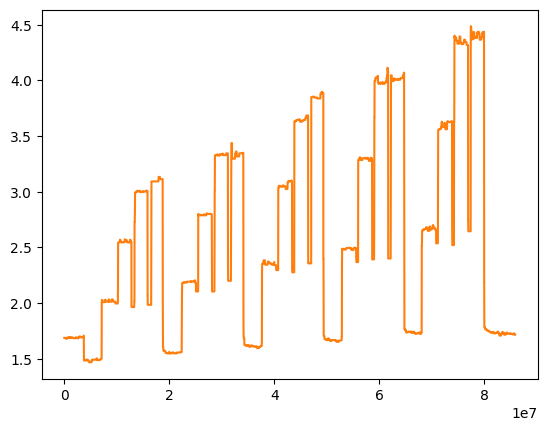

In [21]:
plt.plot(min_cpu_df.time, min_cpu_df['current'], 'tab:orange')


In [81]:
def actual_vs_predicted_plot(loc, actual, predict, test_name):
    loc.scatter(actual,predict)
    loc.plot(np.arange(0,6,0.1), np.arange(0,6,0.1), color="r")
    ax = plt.gca()
    ax.set_xlim([0, 6])
    ax.set_ylim([0, 6])
    loc.set_title("Actual vs Prediction Plot for " + test_name)
    loc.set_xlabel("Actual")
    loc.set_ylabel("Prediction")

In [88]:
import seaborn as sns
def residual_plot(loc, actual, predict, test_name):
    sns.residplot(x=actual, y=predict, scatter_kws={'s': 10}, line_kws={'color': 'red'}, ax=loc)
    loc.plot(np.arange(0,6,0.1), np.zeros(60), color="r")
    loc.set_xlabel('Predicted Values')
    loc.set_ylabel('Residuals')
    loc.set_title('Residual Plot for ' + test_name)
    

## X, Y Declaration

In [69]:
#normal dfs
cpu_df_X = cpu_df_rates.drop(columns=['current', 'time'])
cpu_df_Y = cpu_df_rates['current']

#outlier filtered dfs
of_cpu_df_X = of_cpu_df.drop(columns=['current', 'time'])
of_cpu_df_Y = of_cpu_df['current']

#min filtered dfs
min_cpu_df_X = min_cpu_df.drop(columns=['current', 'time'])
min_cpu_df_Y = min_cpu_df['current']

In [70]:
cpu_df_X.columns

Index(['br_insns_0', 'freq_0', 'br_insns_1', 'freq_1', 'br_insns_2', 'freq_2',
       'br_insns_3', 'freq_3', 'cache_hit_rate_0', 'cache_hit_rate_1',
       'cache_hit_rate_2', 'cache_hit_rate_3', 'br_miss_rate_0',
       'br_miss_rate_1', 'br_miss_rate_2', 'br_miss_rate_3', 'insns_0_norm',
       'insns_1_norm', 'insns_2_norm', 'insns_3_norm', 'cpu_cycle_0_per_time',
       'cpu_cycle_1_per_time', 'cpu_cycle_2_per_time', 'cpu_cycle_3_per_time',
       'bus_cycle_0_per_time', 'bus_cycle_1_per_time', 'bus_cycle_2_per_time',
       'bus_cycle_3_per_time'],
      dtype='object')

## Train on numa-matrix

In [71]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, criterion="squared_error", n_jobs=32)
rf.fit(cpu_df_X, cpu_df_Y)

rf_outlier = RandomForestRegressor(random_state=42, criterion="squared_error", n_jobs=32)
rf_outlier.fit(of_cpu_df_X, of_cpu_df_Y)

rf_min = RandomForestRegressor(random_state=42, criterion="squared_error", n_jobs=32)
rf_min.fit(min_cpu_df_X, min_cpu_df_Y)

RandomForestRegressor(n_jobs=32, random_state=42)

## Testing

In [72]:
#disk-fft
disk_fft_df= pd.read_csv("../results/disk-fft.csv")
preprocessing_rates(disk_fft_df)
preprocessing_time(disk_fft_df)
disk_fft_df_rates = preprocessing_filter_out_non_rates(disk_fft_df)

In [73]:
of_disk_fft_df = disk_fft_df_rates.copy()
# for col_name in disk_fft_df_rates.columns:
of_disk_fft_df = of_disk_fft_df.drop(outlier_filter(of_disk_fft_df, "current", 0.25, 0.90))

1.744 4.008


In [74]:
min_disk_fft_df =  min_filter(disk_fft_df_rates, 200, "current")

In [75]:
disk_fft_df_X = disk_fft_df_rates.drop(columns=['current', 'time'])[cpu_df_X.columns]
disk_fft_df_Y = disk_fft_df_rates['current']

of_disk_fft_df_X = of_disk_fft_df.drop(columns=['current', 'time'])[cpu_df_X.columns]
of_disk_fft_df_Y = of_disk_fft_df['current']

min_disk_fft_df_X = min_disk_fft_df.drop(columns=['current', 'time'])[cpu_df_X.columns]
min_disk_fft_df_Y = min_disk_fft_df['current']


In [76]:
print("normal disk-fft")
print("score: ", rf.score(disk_fft_df_X, disk_fft_df_Y))
disk_fft_predict= rf.predict(disk_fft_df_X)
print("mae:", mean_absolute_error(disk_fft_predict, disk_fft_df_Y))



normal disk-fft
score:  0.8541763610594663
mae: 0.24378216501568184


In [77]:
print("Outlier Filter disk-fft score")
print("score: ", rf_outlier.score(of_disk_fft_df_X, of_disk_fft_df_Y))
of_disk_fft_predict= rf_outlier.predict(of_disk_fft_df_X)
print("mae:", mean_absolute_error(of_disk_fft_predict, of_disk_fft_df_Y))


Outlier Filter disk-fft score
score:  0.8563233651702215
mae: 0.2410781479986336


In [79]:
print("Min Filter disk-fft score")
print("score: ", rf_min.score(min_disk_fft_df_X, min_disk_fft_df_Y))
min_disk_fft_predict= rf_min.predict(min_disk_fft_df_X)
print("mae:", mean_absolute_error(min_disk_fft_predict, min_disk_fft_df_Y))


Min Filter disk-fft score
score:  0.8254739122999193
mae: 0.2041398099555941


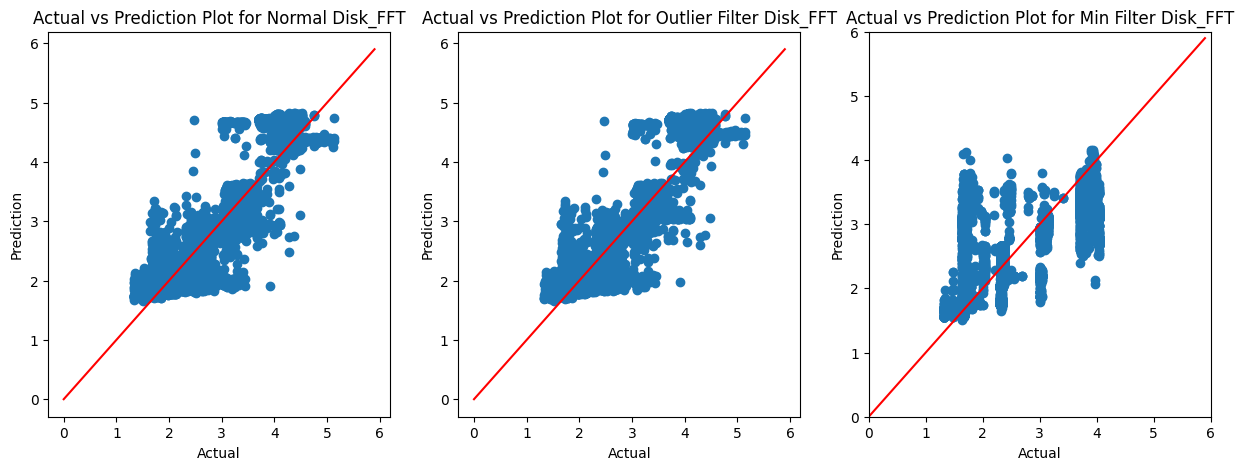

In [97]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
actual_vs_predicted_plot(axs[0], disk_fft_df_Y.to_numpy(), disk_fft_predict, "Normal Disk_FFT")
actual_vs_predicted_plot(axs[1],of_disk_fft_df_Y.to_numpy(), of_disk_fft_predict, "Outlier Filter Disk_FFT")
actual_vs_predicted_plot(axs[2],min_disk_fft_df_Y.to_numpy(), min_disk_fft_predict, "Min Filter Disk_FFT")


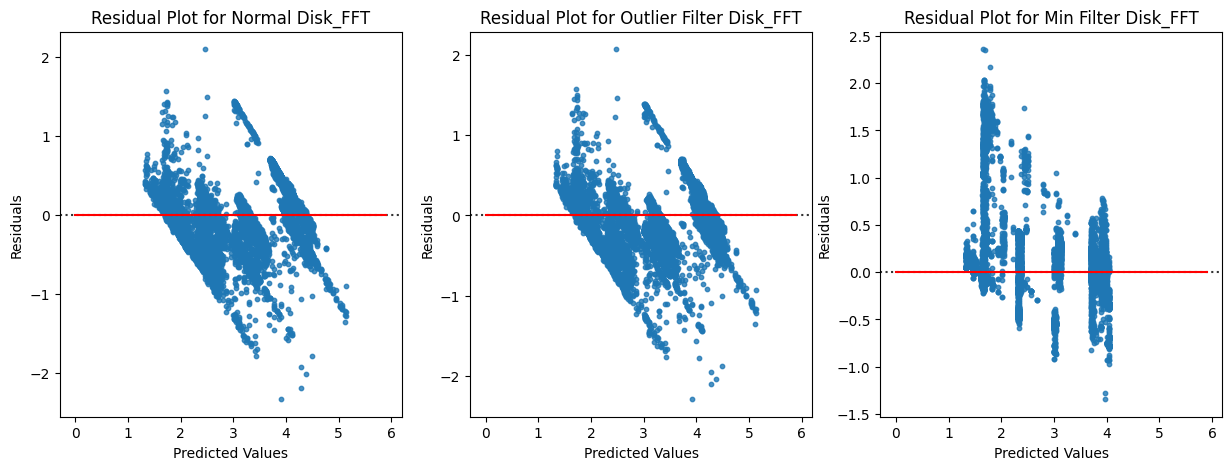

In [98]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
residual_plot(axs[0], disk_fft_df_Y.to_numpy(), disk_fft_predict, "Normal Disk_FFT")
residual_plot(axs[1],of_disk_fft_df_Y.to_numpy(), of_disk_fft_predict, "Outlier Filter Disk_FFT")
residual_plot(axs[2],min_disk_fft_df_Y.to_numpy(), min_disk_fft_predict, "Min Filter Disk_FFT")


In [99]:
#disk-memcpy
disk_memcpy_df= pd.read_csv("../results/disk-memcpy.csv")
preprocessing_rates(disk_memcpy_df)
preprocessing_time(disk_memcpy_df)
disk_memcpy_df_rates = preprocessing_filter_out_non_rates(disk_memcpy_df)

In [100]:
of_disk_memcpy_df = disk_memcpy_df_rates.copy()
# for col_name in disk_memcpy_df_rates.columns:
of_disk_memcpy_df = of_disk_memcpy_df.drop(outlier_filter(of_disk_memcpy_df, "current", 0.25, 0.90))

1.748 4.532


In [101]:
min_disk_memcpy_df =  min_filter(disk_memcpy_df_rates, 200, "current")

In [102]:
disk_memcpy_df_X = disk_memcpy_df_rates.drop(columns=['current', 'time'])[cpu_df_X.columns]
disk_memcpy_df_Y = disk_memcpy_df_rates['current']

of_disk_memcpy_df_X = of_disk_memcpy_df.drop(columns=['current', 'time'])[cpu_df_X.columns]
of_disk_memcpy_df_Y = of_disk_memcpy_df['current']

min_disk_memcpy_df_X = min_disk_memcpy_df.drop(columns=['current', 'time'])[cpu_df_X.columns]
min_disk_memcpy_df_Y = min_disk_memcpy_df['current']

In [103]:
print("normal disk-memcpy")
print("score: ", rf.score(disk_memcpy_df_X, disk_memcpy_df_Y))
disk_memcpy_predict= rf.predict(disk_memcpy_df_X)
print("mae:", mean_absolute_error(disk_memcpy_predict, disk_memcpy_df_Y))



normal disk-memcpy
score:  0.825110416189993
mae: 0.3173477728000692


In [104]:
print("Outlier Filter disk-memcpy")
print("score: ", rf_outlier.score(of_disk_memcpy_df_X, of_disk_memcpy_df_Y))
of_disk_memcpy_predict= rf_outlier.predict(of_disk_memcpy_df_X)
print("mae:", mean_absolute_error(of_disk_memcpy_predict, of_disk_memcpy_df_Y))


Outlier Filter disk-memcpy
score:  0.8208966071676868
mae: 0.31950002316117593


In [105]:
print("Min Filter disk-memcpy score")
print("score: ", rf_min.score(min_disk_memcpy_df_X, min_disk_memcpy_df_Y))
min_disk_memcpy_predict= rf_min.predict(min_disk_memcpy_df_X)
print("mae:", mean_absolute_error(min_disk_memcpy_predict, min_disk_memcpy_df_Y))


Min Filter disk-memcpy score
score:  0.5955502476718486
mae: 0.2994033484828809


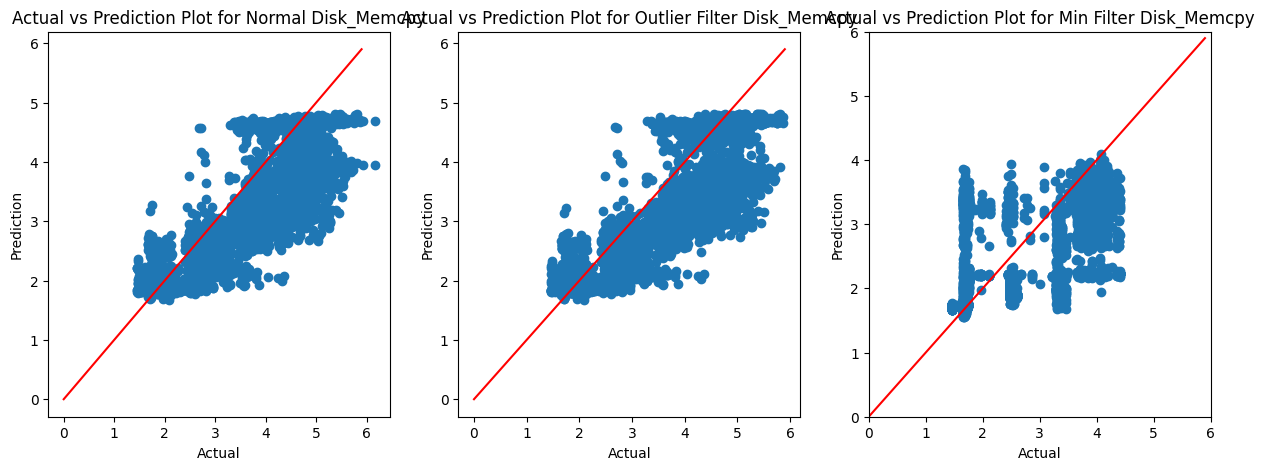

In [107]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
actual_vs_predicted_plot(axs[0], disk_memcpy_df_Y.to_numpy(), disk_memcpy_predict, "Normal Disk_Memcpy")
actual_vs_predicted_plot(axs[1],of_disk_memcpy_df_Y.to_numpy(), of_disk_memcpy_predict, "Outlier Filter Disk_Memcpy")
actual_vs_predicted_plot(axs[2],min_disk_memcpy_df_Y.to_numpy(), min_disk_memcpy_predict, "Min Filter Disk_Memcpy")


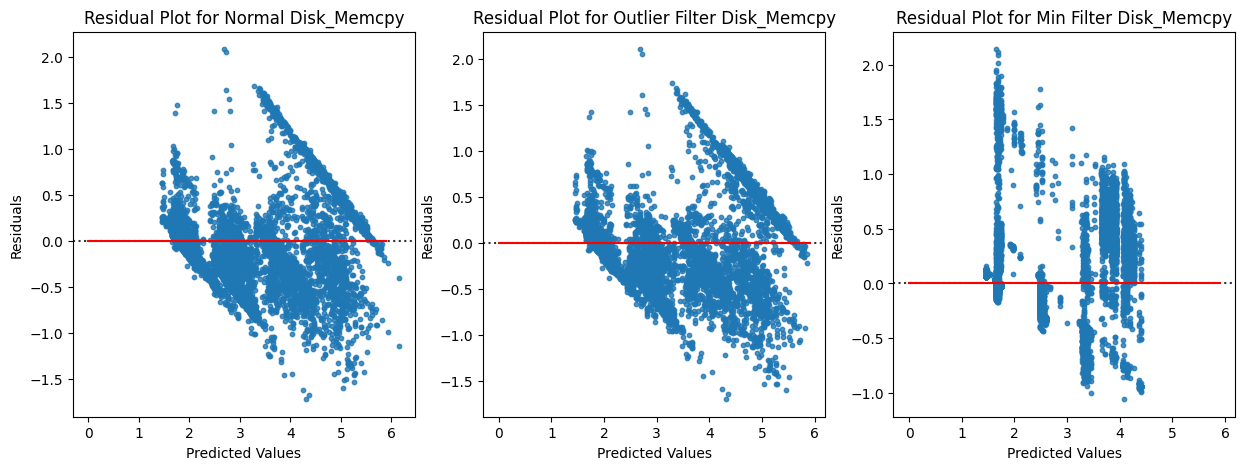

In [108]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
residual_plot(axs[0], disk_memcpy_df_Y.to_numpy(), disk_memcpy_predict, "Normal Disk_Memcpy")
residual_plot(axs[1],of_disk_memcpy_df_Y.to_numpy(), of_disk_memcpy_predict, "Outlier Filter Disk_Memcpy")
residual_plot(axs[2],min_disk_memcpy_df_Y.to_numpy(), min_disk_memcpy_predict, "Min Filter Disk_Memcpy")


In [109]:
#numa-memcpy
numa_memcpy_df= pd.read_csv("../results/numa-memcpy.csv")
preprocessing_rates(numa_memcpy_df)
preprocessing_time(numa_memcpy_df)
numa_memcpy_df_rates = preprocessing_filter_out_non_rates(numa_memcpy_df)


In [110]:
of_numa_memcpy_df = numa_memcpy_df_rates.copy()
# for col_name in numa_memcpy_df_rates.columns:
of_numa_memcpy_df = of_numa_memcpy_df.drop(outlier_filter(of_numa_memcpy_df, "current", 0.25, 0.90))

1.692 2.56


In [111]:
min_numa_memcpy_df =  min_filter(numa_memcpy_df_rates, 200, "current")

In [112]:
numa_memcpy_df_X = numa_memcpy_df_rates.drop(columns=['current', 'time'])[cpu_df_X.columns]
numa_memcpy_df_Y = numa_memcpy_df_rates['current']

of_numa_memcpy_df_X = of_numa_memcpy_df.drop(columns=['current', 'time'])[cpu_df_X.columns]
of_numa_memcpy_df_Y = of_numa_memcpy_df['current']

min_numa_memcpy_df_X = min_numa_memcpy_df.drop(columns=['current', 'time'])[cpu_df_X.columns]
min_numa_memcpy_df_Y = min_numa_memcpy_df['current']

In [113]:
print("normal numa-memcpy")
print("score: ", rf.score(numa_memcpy_df_X, numa_memcpy_df_Y))
numa_memcpy_predict= rf.predict(numa_memcpy_df_X)
print("mae:", mean_absolute_error(numa_memcpy_predict, numa_memcpy_df_Y))


normal numa-memcpy
score:  0.7734495045756609
mae: 0.14021356115779635


In [114]:
print("Outlier Filter numa-memcpy")
print("score: ", rf_outlier.score(of_numa_memcpy_df_X, of_numa_memcpy_df_Y))
of_numa_memcpy_predict= rf_outlier.predict(of_numa_memcpy_df_X)
print("mae:", mean_absolute_error(of_numa_memcpy_predict, of_numa_memcpy_df_Y))


Outlier Filter numa-memcpy
score:  0.7954513004904932
mae: 0.134503688155922


In [115]:
print("Min Filter numa-memcpy score")
print("score: ", rf_min.score(min_numa_memcpy_df_X, min_numa_memcpy_df_Y))
min_numa_memcpy_predict= rf_min.predict(min_numa_memcpy_df_X)
print("mae:", mean_absolute_error(min_numa_memcpy_predict, min_numa_memcpy_df_Y))


Min Filter numa-memcpy score
score:  0.8556963624409618
mae: 0.06213350140055997


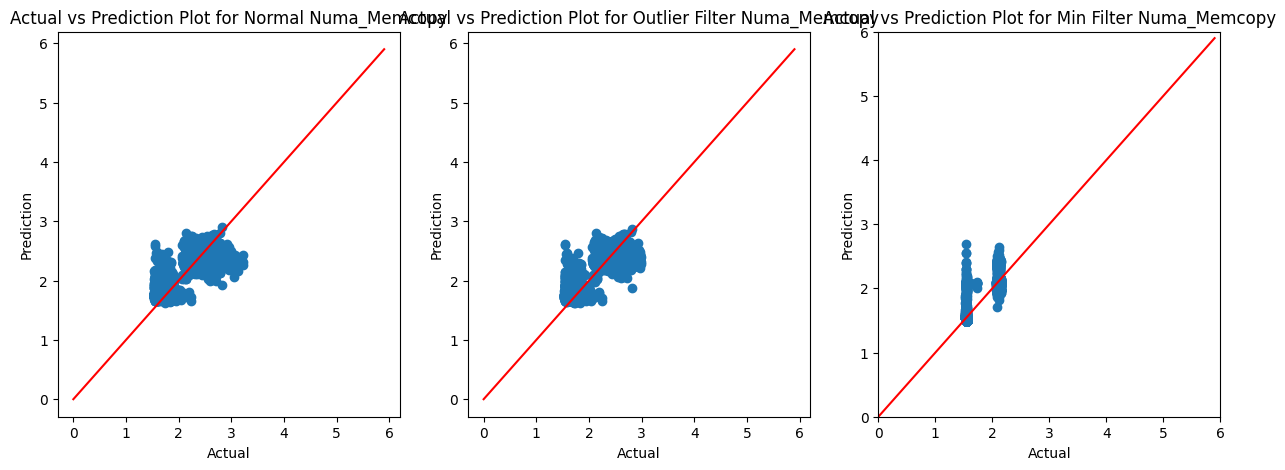

In [126]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
actual_vs_predicted_plot(axs[0], numa_memcpy_df_Y.to_numpy(), numa_memcpy_predict, "Normal Numa_Memcopy")
actual_vs_predicted_plot(axs[1],of_numa_memcpy_df_Y.to_numpy(), of_numa_memcpy_predict, "Outlier Filter Numa_Memcopy")
actual_vs_predicted_plot(axs[2],min_numa_memcpy_df_Y.to_numpy(), min_numa_memcpy_predict, "Min Filter Numa_Memcopy")


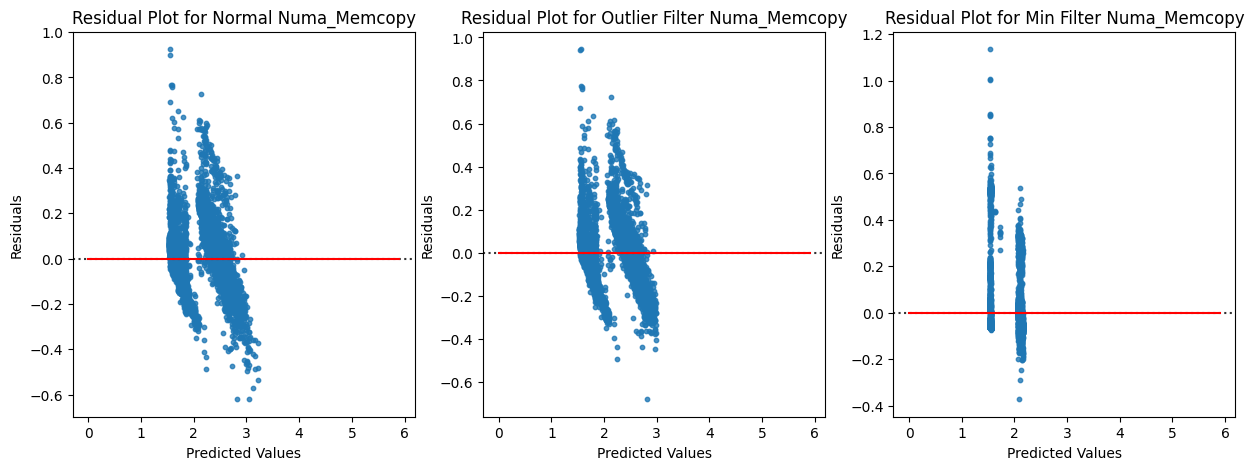

In [127]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
residual_plot(axs[0], numa_memcpy_df_Y.to_numpy(), numa_memcpy_predict, "Normal Numa_Memcopy")
residual_plot(axs[1],of_numa_memcpy_df_Y.to_numpy(), of_numa_memcpy_predict, "Outlier Filter Numa_Memcopy")
residual_plot(axs[2],min_numa_memcpy_df_Y.to_numpy(), min_numa_memcpy_predict, "Min Filter Numa_Memcopy")


In [119]:
#numa-memrate
numa_memrate_df= pd.read_csv("../results/numa-memrate.csv")
preprocessing_rates(numa_memrate_df)
preprocessing_time(numa_memrate_df)
numa_memrate_df_rates = preprocessing_filter_out_non_rates(numa_memrate_df)


In [120]:
of_numa_memrate_df = numa_memrate_df_rates.copy()
# for col_name in numa_memrate_df_rates.columns:
of_numa_memrate_df = of_numa_memrate_df.drop(outlier_filter(of_numa_memrate_df, "current", 0.25, 0.90))

1.616 2.359600000000002


In [121]:
min_numa_memrate_df =  min_filter(numa_memrate_df_rates, 200, "current")

In [122]:
numa_memrate_df_X = numa_memrate_df_rates.drop(columns=['current', 'time'])[cpu_df_X.columns]
numa_memrate_df_Y = numa_memrate_df_rates['current']

of_numa_memrate_df_X = of_numa_memrate_df.drop(columns=['current', 'time'])[cpu_df_X.columns]
of_numa_memrate_df_Y = of_numa_memrate_df['current']

min_numa_memrate_df_X = min_numa_memrate_df.drop(columns=['current', 'time'])[cpu_df_X.columns]
min_numa_memrate_df_Y = min_numa_memrate_df['current']

In [123]:
print("normal numa-memrate")
print("score: ", rf.score(numa_memrate_df_X, numa_memrate_df_Y))
numa_memrate_predict= rf.predict(numa_memrate_df_X)
print("mae:", mean_absolute_error(numa_memrate_predict, numa_memrate_df_Y))




normal numa-memrate
score:  0.7513744715902146
mae: 0.11925557492132659


In [124]:
print("Outlier Filter numa-memrate")
print("score: ", rf_outlier.score(of_numa_memrate_df_X, of_numa_memrate_df_Y))
of_numa_memrate_predict= rf_outlier.predict(of_numa_memrate_df_X)
print("mae:", mean_absolute_error(of_numa_memrate_predict, of_numa_memrate_df_Y))


Outlier Filter numa-memrate
score:  0.7395496542236923
mae: 0.1142675383294493


In [125]:
print("Min Filter numa-memrate score")
print("score: ", rf_min.score(min_numa_memrate_df_X, min_numa_memrate_df_Y))
min_numa_memrate_predict= rf_min.predict(min_numa_memrate_df_X)
print("mae:", mean_absolute_error(min_numa_memrate_predict, min_numa_memrate_df_Y))


Min Filter numa-memrate score
score:  0.46292190066019323
mae: 0.06557948680706852


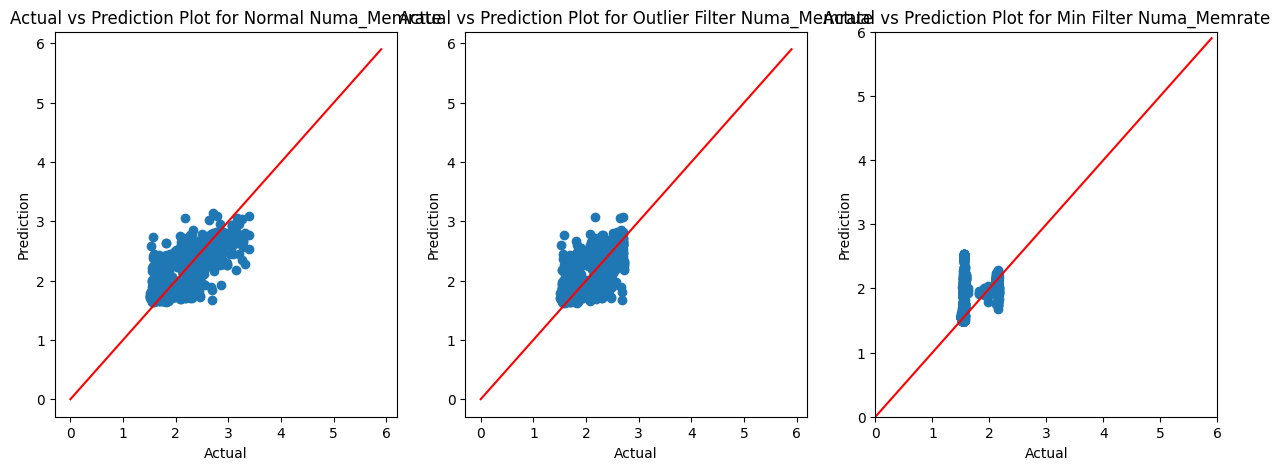

In [128]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
actual_vs_predicted_plot(axs[0], numa_memrate_df_Y.to_numpy(), numa_memrate_predict, "Normal Numa_Memrate")
actual_vs_predicted_plot(axs[1],of_numa_memrate_df_Y.to_numpy(), of_numa_memrate_predict, "Outlier Filter Numa_Memrate")
actual_vs_predicted_plot(axs[2],min_numa_memrate_df_Y.to_numpy(), min_numa_memrate_predict, "Min Filter Numa_Memrate")


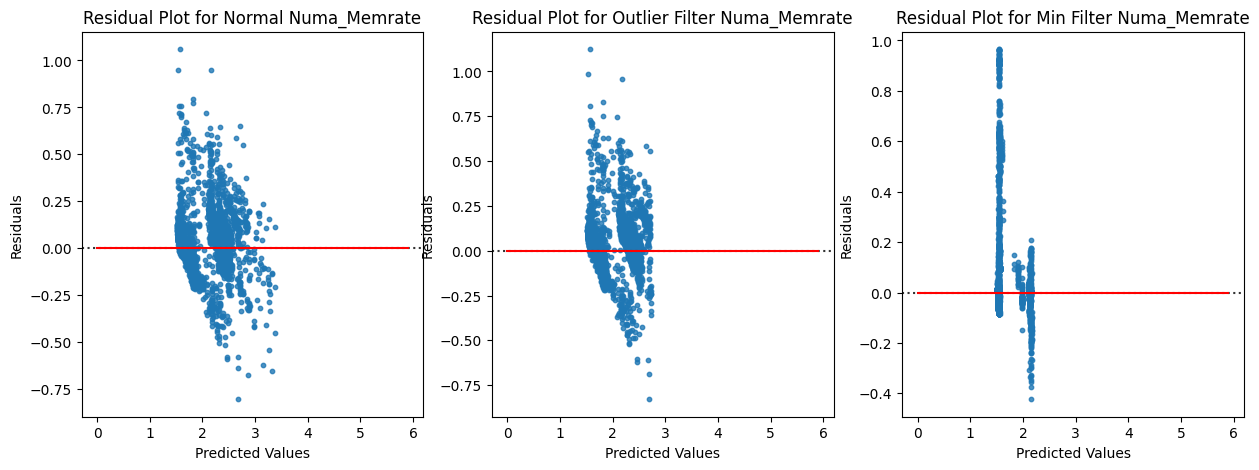

In [129]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
residual_plot(axs[0], numa_memrate_df_Y.to_numpy(), numa_memrate_predict, "Normal Numa_Memrate")
residual_plot(axs[1],of_numa_memrate_df_Y.to_numpy(), of_numa_memrate_predict, "Outlier Filter Numa_Memrate")
residual_plot(axs[2],min_numa_memrate_df_Y.to_numpy(), min_numa_memrate_predict, "Min Filter Numa_Memrate")


In [140]:
#numa-memthrash
numa_memthrash_df= pd.read_csv("../results/numa-memthrash.csv")
preprocessing_rates(numa_memthrash_df)
preprocessing_time(numa_memthrash_df)
numa_memthrash_df_rates = preprocessing_filter_out_non_rates(numa_memthrash_df)


In [141]:
of_numa_memthrash_df = numa_memthrash_df_rates.copy()
# for col_name in numa_memthrash_df_rates.columns:
of_numa_memthrash_df = of_numa_memthrash_df.drop(outlier_filter(of_numa_memthrash_df, "current", 0.25, 0.90))

1.696 2.752


In [142]:
min_numa_memthrash_df =  min_filter(numa_memthrash_df_rates, 200, "current")

In [143]:
numa_memthrash_df_X = numa_memthrash_df_rates.drop(columns=['current', 'time'])[cpu_df_X.columns]
numa_memthrash_df_Y = numa_memthrash_df_rates['current']

of_numa_memthrash_df_X = of_numa_memthrash_df.drop(columns=['current', 'time'])[cpu_df_X.columns]
of_numa_memthrash_df_Y = of_numa_memthrash_df['current']

min_numa_memthrash_df_X = min_numa_memthrash_df.drop(columns=['current', 'time'])[cpu_df_X.columns]
min_numa_memthrash_df_Y = min_numa_memthrash_df['current']

In [144]:
print("normal numa-memthrash")
print("score: ", rf.score(numa_memthrash_df_X, numa_memthrash_df_Y))
numa_memthrash_predict= rf.predict(numa_memthrash_df_X)
print("mae:", mean_absolute_error(numa_memthrash_predict, numa_memthrash_df_Y))




normal numa-memthrash
score:  0.6787519573286729
mae: 0.19652101995565416


In [145]:
print("Outlier Filter numa-memthrash")
print("score: ", rf_outlier.score(of_numa_memthrash_df_X, of_numa_memthrash_df_Y))
of_numa_memthrash_predict= rf_outlier.predict(of_numa_memthrash_df_X)
print("mae:", mean_absolute_error(of_numa_memthrash_predict, of_numa_memthrash_df_Y))


Outlier Filter numa-memthrash
score:  0.6595039468970127
mae: 0.20190799371592277


In [146]:
print("Min Filter numa-memthrash score")
print("score: ", rf_min.score(min_numa_memthrash_df_X, min_numa_memthrash_df_Y))
min_numa_memthrash_predict= rf_min.predict(min_numa_memthrash_df_X)
print("mae:", mean_absolute_error(min_numa_memthrash_predict, min_numa_memthrash_df_Y))


Min Filter numa-memthrash score
score:  0.5444925359899263
mae: 0.12901551367331912


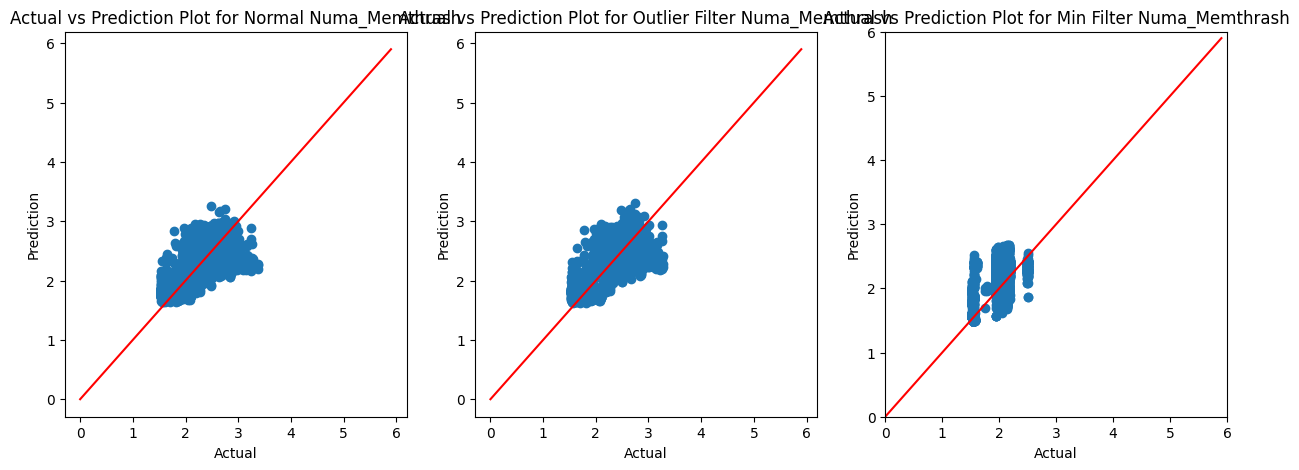

In [147]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
actual_vs_predicted_plot(axs[0], numa_memthrash_df_Y.to_numpy(), numa_memthrash_predict, "Normal Numa_Memthrash")
actual_vs_predicted_plot(axs[1],of_numa_memthrash_df_Y.to_numpy(), of_numa_memthrash_predict, "Outlier Filter Numa_Memthrash")
actual_vs_predicted_plot(axs[2],min_numa_memthrash_df_Y.to_numpy(), min_numa_memthrash_predict, "Min Filter Numa_Memthrash")


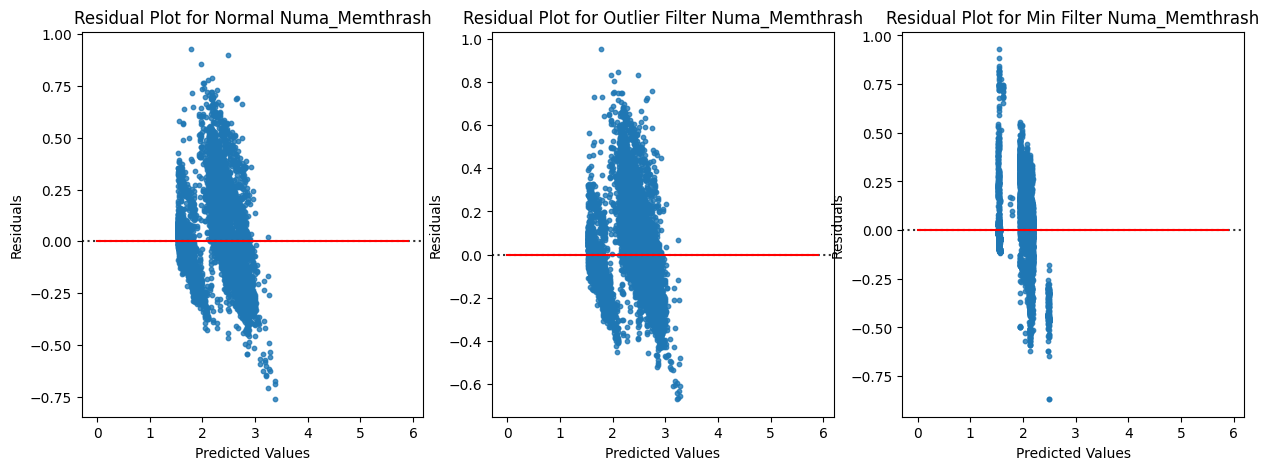

In [148]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
residual_plot(axs[0], numa_memthrash_df_Y.to_numpy(), numa_memthrash_predict, "Normal Numa_Memthrash")
residual_plot(axs[1],of_numa_memthrash_df_Y.to_numpy(), of_numa_memthrash_predict, "Outlier Filter Numa_Memthrash")
residual_plot(axs[2],min_numa_memthrash_df_Y.to_numpy(), min_numa_memthrash_predict, "Min Filter Numa_Memthrash")


## Miscellaneous


In [3]:
cpu_df = pd.read_csv('../results/numa-matrix.csv')

cpu_df['cache_hit_rate_0'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_0']) / cpu_df['cache_hit_0']
cpu_df['cache_hit_rate_1'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_1']) / cpu_df['cache_hit_1']
cpu_df['cache_hit_rate_2'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_2']) / cpu_df['cache_hit_2']
cpu_df['cache_hit_rate_3'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_3']) / cpu_df['cache_hit_3']
cpu_df['cache_hit_rate_avg'] = (cpu_df['cache_hit_rate_0'] + cpu_df['cache_hit_rate_1'] + cpu_df['cache_hit_rate_2'] + cpu_df['cache_hit_rate_3']) / 4

cpu_df['br_miss_rate_0'] = cpu_df['br_miss_0'] / cpu_df['br_insns_0']
cpu_df['br_miss_rate_1'] = cpu_df['br_miss_1'] / cpu_df['br_insns_1']
cpu_df['br_miss_rate_2'] = cpu_df['br_miss_2'] / cpu_df['br_insns_2']
cpu_df['br_miss_rate_3'] = cpu_df['br_miss_3'] / cpu_df['br_insns_3']
cpu_df['br_miss_rate_avg'] = (cpu_df['br_miss_rate_0'] + cpu_df['br_miss_rate_1'] + cpu_df['br_miss_rate_2'] + cpu_df['br_miss_rate_3']) / 4

cpu_df['clock_speed'] = (cpu_df['insns_0'] + cpu_df['insns_1'] + cpu_df['insns_2'] + cpu_df['insns_3']) / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['insns_0_norm'] = cpu_df['insns_0'] / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['insns_1_norm'] = cpu_df['insns_1'] / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df = cpu_df.drop(index=0)

cpu_df

,time,current,cpu_cycles_0,insns_0,cache_hit_0,cache_miss_0,br_insns_0,br_miss_0,bus_cycles_0,freq_0,...,cache_hit_rate_3,cache_hit_rate_avg,br_miss_rate_0,br_miss_rate_1,br_miss_rate_2,br_miss_rate_3,br_miss_rate_avg,clock_speed,insns_0_norm,insns_1_norm
1,2691,1.944,41410,17962,6689,49,1839,269,12316,1000000,...,0.095378,1.325407,0.146275,0.145540,0.145161,0.071332,0.127077,110.913761,10.985933,5.401835
2,4241,1.944,34196,15660,5781,47,1506,217,8640,1000000,...,0.082494,1.168169,0.144090,0.142410,0.136150,0.066108,0.122190,114.068387,10.103226,6.045806
3,5791,1.944,34102,15662,5788,47,1504,215,8694,1000000,...,0.081686,1.168610,0.142952,0.133020,0.133020,0.065680,0.118668,115.636129,10.104516,6.018710
4,7334,1.944,34136,15662,5786,43,1506,212,8704,1000000,...,0.082869,1.168906,0.140770,0.133020,0.134585,0.063811,0.118047,115.077771,10.150356,6.072586
5,8921,1.696,39433,18766,6861,46,1889,266,11450,1000000,...,0.102554,1.342222,0.140815,0.140845,0.133020,0.064334,0.119754,113.204789,11.824827,5.908633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44534,85867080,2.124,385838,281251,104991,1052,71448,1853,188760,1000000,...,29.744970,22.591855,0.025935,0.131054,0.128940,0.126062,0.102998,201.801418,181.335268,6.800774
44535,85868638,1.864,383606,280188,104460,1042,71309,1760,187630,1000000,...,29.586119,22.480668,0.024681,0.128205,0.128940,0.126062,0.101972,200.195764,179.838254,6.772786
44536,85870213,1.864,384577,281824,104941,1030,72172,1799,188162,1000000,...,29.797785,22.601882,0.024927,0.129630,0.128940,0.128205,0.102925,199.099048,178.935873,6.714921
44537,85871770,1.864,380460,278786,103895,997,71127,1737,186062,1000000,...,29.484530,22.373209,0.024421,0.128205,0.130372,0.129630,0.103157,199.432241,179.053308,6.808606


In [4]:
#cpu cycles over time
cpu_df['cpu_cycle_0_per_time'] = cpu_df['cpu_cycles_0']  / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['cpu_cycle_1_per_time'] = cpu_df['cpu_cycles_1']  / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['cpu_cycle_2_per_time'] = cpu_df['cpu_cycles_2']  / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['cpu_cycle_3_per_time'] = cpu_df['cpu_cycles_3']  / (cpu_df['time'] - cpu_df['time'].shift())
#isn't clockspeed instructions/time?
#branch miss rate over time
cpu_df['br_miss_0_per_time'] = cpu_df['br_miss_0']  / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['br_miss_1_per_time'] = cpu_df['br_miss_1']  / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['br_miss_2_per_time'] = cpu_df['br_miss_2']  / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['br_miss_3_per_time'] = cpu_df['br_miss_3']  / (cpu_df['time'] - cpu_df['time'].shift())
#cache_miss_rate over time
cpu_df['cache_miss_0_per_time'] = cpu_df['cache_miss_0']  / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['cache_miss_1_per_time'] = cpu_df['cache_miss_1']  / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['cache_miss_2_per_time'] = cpu_df['cache_miss_2']  / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['cache_miss_3_per_time'] = cpu_df['cache_miss_3']  / (cpu_df['time'] - cpu_df['time'].shift())
#cache_hit_rate over time
cpu_df['cache_hit_0_per_time'] = cpu_df['cache_hit_0']  / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['cache_hit_1_per_time'] = cpu_df['cache_hit_1']  / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['cache_hit_2_per_time'] = cpu_df['cache_hit_2']  / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['cache_hit_3_per_time'] = cpu_df['cache_hit_3']  / (cpu_df['time'] - cpu_df['time'].shift())

In [5]:
cpu_df

,time,current,cpu_cycles_0,insns_0,cache_hit_0,cache_miss_0,br_insns_0,br_miss_0,bus_cycles_0,freq_0,...,br_miss_2_per_time,br_miss_3_per_time,cache_miss_0_per_time,cache_miss_1_per_time,cache_miss_2_per_time,cache_miss_3_per_time,cache_hit_0_per_time,cache_hit_1_per_time,cache_hit_2_per_time,cache_hit_3_per_time
1,2691,1.944,41410,17962,6689,49,1839,269,12316,1000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4241,1.944,34196,15660,5781,47,1506,217,8640,1000000,...,0.056129,1.140000,0.030323,0.013548,0.013548,0.660000,3.729677,2.065161,2.065806,37.210968
3,5791,1.944,34102,15662,5788,47,1504,215,8694,1000000,...,0.054839,1.156129,0.030323,0.013548,0.016129,0.641290,3.734194,2.065806,2.065806,37.863226
4,7334,1.944,34136,15662,5786,43,1506,212,8704,1000000,...,0.055736,1.114064,0.027868,0.013610,0.016202,0.636423,3.749838,2.074530,2.075178,37.570318
5,8921,1.696,39433,18766,6861,46,1889,266,11450,1000000,...,0.053560,1.071834,0.028986,0.013233,0.014493,0.591052,4.323251,2.017013,2.017013,36.392565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44534,85867080,2.124,385838,281251,104991,1052,71448,1853,188760,1000000,...,0.058027,0.057382,0.678272,0.013540,0.016119,0.013540,67.692456,2.271438,2.268214,2.275306
44535,85868638,1.864,383606,280188,104460,1042,71309,1760,187630,1000000,...,0.057766,0.057125,0.668806,0.013479,0.018614,0.013479,67.047497,2.260591,2.257381,2.265725
44536,85870213,1.864,384577,281824,104941,1030,72172,1799,188162,1000000,...,0.057143,0.057143,0.653968,0.013968,0.018413,0.014603,66.629206,2.235556,2.233651,2.235556
44537,85871770,1.864,380460,278786,103895,997,71127,1737,186062,1000000,...,0.058446,0.058446,0.640334,0.013487,0.016699,0.013487,66.727681,2.261400,2.260116,2.262685


In [6]:
cpu_df['cpu_cycle_0_per_time']

1               NaN
2         22.061935
3         22.001290
4         22.123137
5         24.847511
            ...    
44534    248.767247
44535    246.216945
44536    244.175873
44537    244.354528
44538    245.354153
Name: cpu_cycle_0_per_time, Length: 44538, dtype: float64

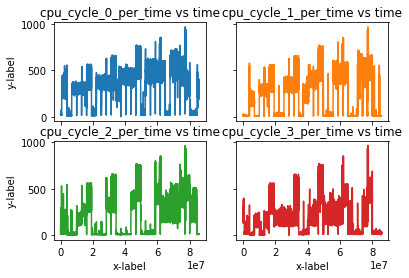

In [7]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(cpu_df.time, cpu_df['cpu_cycle_0_per_time'])
axs[0, 0].set_title('cpu_cycle_0_per_time vs time')
axs[0, 1].plot(cpu_df.time, cpu_df['cpu_cycle_1_per_time'], 'tab:orange')
axs[0, 1].set_title('cpu_cycle_1_per_time vs time')
axs[1, 0].plot(cpu_df.time, cpu_df['cpu_cycle_2_per_time'], 'tab:green')
axs[1, 0].set_title('cpu_cycle_2_per_time vs time')
axs[1, 1].plot(cpu_df.time, cpu_df['cpu_cycle_3_per_time'], 'tab:red')
axs[1, 1].set_title('cpu_cycle_3_per_time vs time')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()



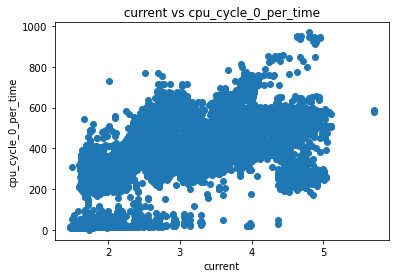

In [8]:
import matplotlib.pyplot as plt
plt.scatter(cpu_df.current, cpu_df['cpu_cycle_0_per_time'])
plt.title(" current vs cpu_cycle_0_per_time ")
plt.xlabel("current")
plt.ylabel("cpu_cycle_0_per_time")
plt.show()


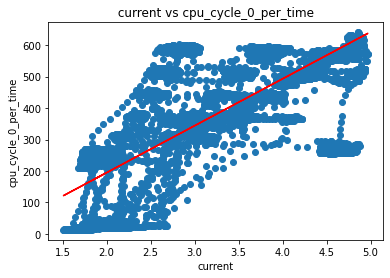

In [9]:
window_size = 15
plt.scatter(cpu_df.current.rolling(window=window_size).mean(), cpu_df['cpu_cycle_0_per_time'].rolling(window=window_size).mean())
plt.title(" current vs cpu_cycle_0_per_time ")
plt.xlabel("current")
plt.ylabel("cpu_cycle_0_per_time")

cpu_0_linear = LinearRegression()
cpu_0_linear.fit(cpu_df['current'].rolling(window=window_size).mean().dropna()[1:].values.reshape(-1, 1),cpu_df['cpu_cycle_0_per_time'].rolling(window=window_size).mean().dropna().values.reshape(-1, 1),)


plt.plot(cpu_df['current'].rolling(window=window_size).mean().dropna()[1:].values.reshape(-1, 1),
         cpu_0_linear.predict(cpu_df['current'].rolling(window=window_size).mean().dropna()[1:].values.reshape(-1, 1)),
         color='red')

plt.show()



In [10]:
cpu_df.current.rolling(window=window_size).mean().dropna()

15       1.840533
16       1.848000
17       1.848267
18       1.848533
19       1.848800
           ...   
44534    1.924533
44535    1.930667
44536    1.936800
44537    1.946667
44538    1.956533
Name: current, Length: 44524, dtype: float64

In [11]:
cpu_df['cpu_cycle_0_per_time'].rolling(window=window_size).mean().dropna()


16        23.546168
17        23.306940
18        23.780565
19        23.611116
20        23.186180
            ...    
44534    247.999799
44535    247.948454
44536    247.749495
44537    247.575539
44538    247.015105
Name: cpu_cycle_0_per_time, Length: 44523, dtype: float64

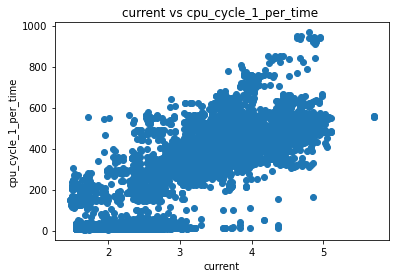

In [12]:
plt.scatter(cpu_df.current, cpu_df['cpu_cycle_1_per_time'])

plt.title("current vs cpu_cycle_1_per_time ")
plt.xlabel("current")
plt.ylabel("cpu_cycle_1_per_time")
plt.show()


In [14]:
# from scipy.stats import gaussian_kde

# # Assuming 'data' is your dataset
# kernel_current = gaussian_kde(cpu_df['current'])
# smoothed_data_current = kernel_current(cpu_df['current'])

# kernel_cpu = gaussian_kde(cpu_df['cpu_cycle_1_per_time'].dropna())
# smoothed_data_cpu = kernel_cpu(cpu_df['cpu_cycle_1_per_time'].dropna())




In [16]:
# plt.scatter(smoothed_data_current[1:], smoothed_data_cpu)

# plt.title("current vs cpu_cycle_1_per_time ")
# plt.xlabel("current")
# plt.ylabel("cpu_cycle_1_per_time")
# plt.show()
# # len(smoothed_data_current), len(smoothed_data_cpu)

In [17]:
# plt.scatter(cpu_df.current, cpu_df['cpu_cycle_2_per_time'])
# plt.title("current vs cpu_cycle_2_per_time ")
# plt.xlabel("current")
# plt.ylabel("cpu_cycle_2_per_time")
# # plt.show()


In [ ]:
# import statsmodels.api as sm

# # Assuming 'x' and 'y' are your data
# lowess = sm.nonparametric.lowess(cpu_df['cpu_cycle_2_per_time'], cpu_df.current, frac=0.2)  # Adjust 'frac' as needed
# smoothed_x, smoothed_y = lowess.T

In [ ]:
# plt.scatter(cpu_df.current, cpu_df['cpu_cycle_3_per_time'])
# plt.title("current vs cpu_cycle_3_per_time ")
# plt.xlabel("current")
# plt.ylabel("cpu_cycle_3_per_time")
# plt.show()


In [19]:
# from scipy.signal import savgol_filter

# # Assuming 'x' and 'y' are your data
# window_size = 5  # Adjust this as needed
# smoothed_current = savgol_filter(cpu_df.current, window_size, 2)
# smoothed_cpu = savgol_filter(cpu_df['cpu_cycle_3_per_time'], window_size, 2)
# len(smoothed_current), len(smoothed_cpu)

In [20]:
# plt.scatter(smoothed_current, smoothed_cpu)
# plt.title("current vs cpu_cycle_3_per_time ")
# plt.xlabel("current")
# plt.ylabel("cpu_cycle_3_per_time")
# plt.show()


In [21]:
cpu_cycles_current = cpu_df[['current', 'cpu_cycle_0_per_time','cpu_cycle_1_per_time','cpu_cycle_2_per_time','cpu_cycle_3_per_time']].sample(n=2000, random_state=1)

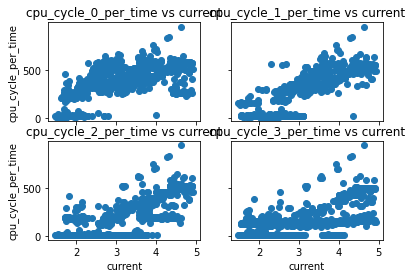

In [22]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(cpu_cycles_current.current, cpu_cycles_current['cpu_cycle_0_per_time'])
axs[0, 0].set_title('cpu_cycle_0_per_time vs current')
axs[0, 1].scatter(cpu_cycles_current.current, cpu_cycles_current['cpu_cycle_1_per_time'])
axs[0, 1].set_title('cpu_cycle_1_per_time vs current')
axs[1, 0].scatter(cpu_cycles_current.current, cpu_cycles_current['cpu_cycle_2_per_time'])
axs[1, 0].set_title('cpu_cycle_2_per_time vs current')
axs[1, 1].scatter(cpu_cycles_current.current, cpu_cycles_current['cpu_cycle_3_per_time'])
axs[1, 1].set_title('cpu_cycle_3_per_time vs current')

for ax in axs.flat:
    ax.set(xlabel='current', ylabel='cpu_cycle_per_time')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

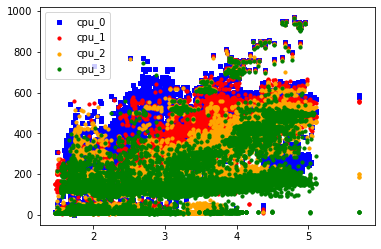

In [23]:

plt.scatter(cpu_df.current, cpu_df['cpu_cycle_0_per_time'], s=10, c='b', marker="s", label='cpu_0')
plt.scatter(cpu_df.current, cpu_df['cpu_cycle_1_per_time'], s=10, c='r', marker="o", label='cpu_1')
plt.scatter(cpu_df.current, cpu_df['cpu_cycle_2_per_time'], s=10, c='orange', marker="o", label='cpu_2')
plt.scatter(cpu_df.current, cpu_df['cpu_cycle_3_per_time'], s=10, c='g', marker="o", label='cpu_3')
plt.legend(loc='upper left')
plt.show()

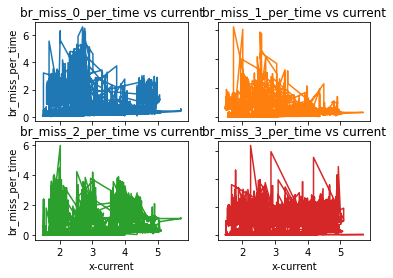

In [12]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(cpu_df.current, cpu_df['br_miss_0_per_time'])
axs[0, 0].set_title('br_miss_0_per_time vs current')
axs[0, 1].plot(cpu_df.current, cpu_df['br_miss_1_per_time'], 'tab:orange')
axs[0, 1].set_title('br_miss_1_per_time vs current')
axs[1, 0].plot(cpu_df.current, cpu_df['br_miss_2_per_time'], 'tab:green')
axs[1, 0].set_title('br_miss_2_per_time vs current')
axs[1, 1].plot(cpu_df.current, cpu_df['br_miss_3_per_time'], 'tab:red')
axs[1, 1].set_title('br_miss_3_per_time vs current')

for ax in axs.flat:
    ax.set(xlabel='x-current', ylabel='br_miss_per_time')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

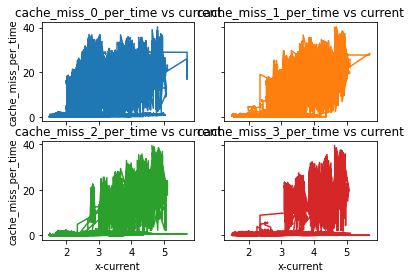

In [13]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(cpu_df.current, cpu_df['cache_miss_0_per_time'])
axs[0, 0].set_title('cache_miss_0_per_time vs current')
axs[0, 1].plot(cpu_df.current, cpu_df['cache_miss_1_per_time'], 'tab:orange')
axs[0, 1].set_title('cache_miss_1_per_time vs current')
axs[1, 0].plot(cpu_df.current, cpu_df['cache_miss_2_per_time'], 'tab:green')
axs[1, 0].set_title('cache_miss_2_per_time vs current')
axs[1, 1].plot(cpu_df.current, cpu_df['cache_miss_3_per_time'], 'tab:red')
axs[1, 1].set_title('cache_miss_3_per_time vs current')

for ax in axs.flat:
    ax.set(xlabel='x-current', ylabel='cache_miss_per_time')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

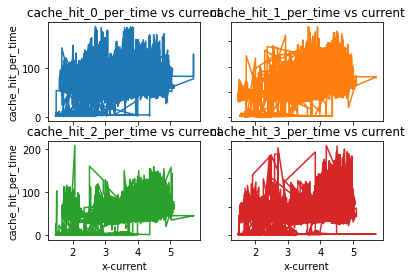

In [14]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(cpu_df.current, cpu_df['cache_hit_0_per_time'])
axs[0, 0].set_title('cache_hit_0_per_time vs current')
axs[0, 1].plot(cpu_df.current, cpu_df['cache_hit_1_per_time'], 'tab:orange')
axs[0, 1].set_title('cache_hit_1_per_time vs current')
axs[1, 0].plot(cpu_df.current, cpu_df['cache_hit_2_per_time'], 'tab:green')
axs[1, 0].set_title('cache_hit_2_per_time vs current')
axs[1, 1].plot(cpu_df.current, cpu_df['cache_hit_3_per_time'], 'tab:red')
axs[1, 1].set_title('cache_hit_3_per_time vs current')

for ax in axs.flat:
    ax.set(xlabel='x-current', ylabel='cache_hit_per_time')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [15]:
cpu_df.drop('time', axis=1).corr()['current']

current                  1.000000
cpu_cycles_0             0.379546
insns_0                  0.362891
cache_hit_0              0.350475
cache_miss_0             0.397269
                           ...   
cache_miss_3_per_time    0.499261
cache_hit_0_per_time     0.556487
cache_hit_1_per_time     0.803875
cache_hit_2_per_time     0.600145
cache_hit_3_per_time     0.574634
Name: current, Length: 62, dtype: float64

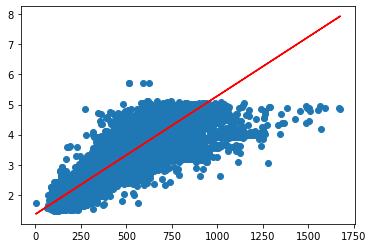

In [16]:
cpu_linear = LinearRegression()
cpu_linear.fit(cpu_df['clock_speed'].values.reshape(-1, 1),
               cpu_df['current'].values.reshape(-1, 1))

plt.scatter(cpu_df['clock_speed'].values.reshape(-1, 1),
            cpu_df['current'].values.reshape(-1, 1))
plt.plot(cpu_df['clock_speed'].values.reshape(-1, 1),
         cpu_linear.predict(cpu_df['clock_speed'].values.reshape(-1, 1)),
         color='red')

In [17]:
#filtering out outliers to better see patterns in cpu_cycles

# calculate IQR for column A
Q1 = cpu_df['clock_speed'].quantile(0.25)
Q3 = cpu_df['clock_speed'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = cpu_df[(cpu_df['clock_speed'] < Q1 - threshold * IQR) | (cpu_df['clock_speed'] > Q3 + threshold * IQR)]

In [18]:
filtered_cpu = cpu_df.drop(outliers.index)

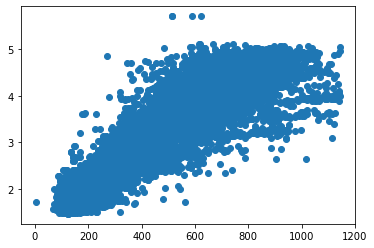

In [19]:
plt.scatter(filtered_cpu["clock_speed"].values.reshape(-1, 1),
            filtered_cpu['current'].values.reshape(-1, 1))

<AxesSubplot:xlabel='time'>

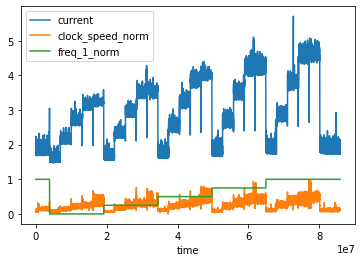

In [20]:
cpu_df['clock_speed_norm'] = min_max_scaling(cpu_df['clock_speed'])
cpu_df['freq_1_norm'] = min_max_scaling(cpu_df['freq_1'])

cpu_df.plot(x='time', y=['current', 'clock_speed_norm', 'freq_1_norm'])

In [31]:
from sklearn.model_selection import train_test_split
cpu_df_rates=cpu_df.dropna().drop(columns=["cpu_cycles_0", "cpu_cycles_1","cpu_cycles_2", "cpu_cycles_3","cache_miss_0","cache_miss_1","cache_miss_2","cache_miss_3","cache_hit_0","cache_hit_1","cache_hit_2","cache_hit_3","br_miss_rate_0","br_miss_rate_1","br_miss_rate_2","br_miss_rate_3","insns_0","insns_1","insns_2","insns_3"])
df_X = cpu_df_rates.drop(columns=['current', 'time'])
df_Y = cpu_df_rates['current'].astype(int)
X_dev, X_test, y_dev, y_test = train_test_split(df_X, df_Y, random_state=42, test_size=0.2)

In [32]:
cpu_df_rates.columns

Index(['time', 'current', 'br_insns_0', 'br_miss_0', 'bus_cycles_0', 'freq_0',
       'br_insns_1', 'br_miss_1', 'bus_cycles_1', 'freq_1', 'br_insns_2',
       'br_miss_2', 'bus_cycles_2', 'freq_2', 'br_insns_3', 'br_miss_3',
       'bus_cycles_3', 'freq_3', 'cache_hit_rate_0', 'cache_hit_rate_1',
       'cache_hit_rate_2', 'cache_hit_rate_3', 'cache_hit_rate_avg',
       'br_miss_rate_avg', 'clock_speed', 'insns_0_norm', 'insns_1_norm',
       'cpu_cycle_0_per_time', 'cpu_cycle_1_per_time', 'cpu_cycle_2_per_time',
       'cpu_cycle_3_per_time', 'br_miss_0_per_time', 'br_miss_1_per_time',
       'br_miss_2_per_time', 'br_miss_3_per_time', 'cache_miss_0_per_time',
       'cache_miss_1_per_time', 'cache_miss_2_per_time',
       'cache_miss_3_per_time', 'cache_hit_0_per_time', 'cache_hit_1_per_time',
       'cache_hit_2_per_time', 'cache_hit_3_per_time'],
      dtype='object')

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_dev, y_dev)
print(rf.score(X_test, y_test))
y_predict=rf.predict(X_test)


0.9267776126957138


In [43]:
disk_fft_df=pd.read_csv("../results/disk-fft.csv")

In [44]:
disk_fft_df

,time,current,cpu_cycles_0,insns_0,cache_hit_0,cache_miss_0,br_insns_0,br_miss_0,bus_cycles_0,freq_0,...,cpu_cycles_3,insns_3,cache_hit_3,cache_miss_3,br_insns_3,br_miss_3,bus_cycles_3,freq_3,rd_ios,wr_ios
0,1941,0.000,219431,94905,40689,1605,11688,2582,102707,600000,...,0,0,0,0,0,0,0,600000,2299034473,448
1,4769,1.700,71033,18552,6900,71,1771,301,11827,600000,...,21190,9424,3199,29,637,88,1783,600000,0,0
2,7409,1.700,38239,17921,6678,49,1743,270,10658,600000,...,20074,8899,3160,32,615,85,1551,600000,0,0
3,10036,1.360,28368,13012,4759,42,1147,166,5855,600000,...,20035,9339,3199,32,637,87,1662,600000,0,0
4,12772,1.360,85171,28466,11332,546,3380,779,35475,600000,...,20057,9354,3198,29,637,88,1719,600000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64402,108964410,1.764,383946,280108,104320,1152,71554,1865,187870,1000000,...,22020,10544,3521,28,702,92,1850,1000000,0,0
64403,108966041,1.764,384303,280161,104506,1113,71363,1872,187970,1000000,...,22002,10555,3520,29,703,90,1836,1000000,0,0
64404,108967670,1.764,381951,278920,103926,1118,71170,1844,186821,1000000,...,22040,10591,3522,28,702,93,1854,1000000,0,0
64405,108969320,1.764,403928,282877,105568,1203,71686,2030,197791,1000000,...,21904,10550,3520,30,702,89,1892,1000000,0,0


Text(0.5, 1.0, 'Random Forest Feature Importances')

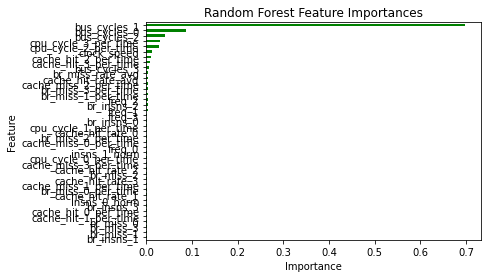

In [37]:
rf_importances = pd.Series(rf.feature_importances_, index=X_dev.columns)
rf_importances.sort_values(ascending=True, inplace=True)
rf_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importances")

In [38]:
rf_importances

br_insns_1               0.001127
br_miss_1                0.001191
br_miss_3                0.001303
br_miss_0                0.001328
cache_hit_1_per_time     0.001418
cache_hit_0_per_time     0.001458
br_insns_3               0.001585
insns_0_norm             0.001635
cache_hit_rate_1         0.001923
br_miss_0_per_time       0.002024
cache_miss_1_per_time    0.002031
cache_hit_rate_3         0.002088
br_miss_2                0.002183
cache_hit_rate_2         0.002243
cache_miss_3_per_time    0.002281
cpu_cycle_0_per_time     0.002303
insns_1_norm             0.002330
freq_0                   0.002337
cache_miss_0_per_time    0.002412
br_miss_2_per_time       0.002485
cache_hit_rate_0         0.002517
cpu_cycle_1_per_time     0.002581
br_insns_0               0.002584
freq_3                   0.002737
freq_1                   0.003000
br_insns_2               0.003160
freq_2                   0.003574
br_miss_1_per_time       0.003615
br_miss_3_per_time       0.003970
cache_miss_2_p

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


# Define the hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest Regressor
rf = RandomForestRegressor(oob_score=True, random_state=42)

# Perform Grid Search with OOB error as a scoring metric
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_dev, y_dev)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Random Forest model with the best hyperparameters
best_rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
best_rf.fit(df_X, df_Y)

# Evaluate the model on the out-of-bag data
oob_error = 1 - best_rf.oob_score_
print("Out-of-Bag Error (OOB Error):", oob_error)

KeyboardInterrupt: 

In [40]:
# num_estimators = [100, 200, 300, 400, 500] 
# min_samples_leaves = [1, 2, 4, 8, 16]

# best_params = [-1, -1]
# highest_f1_score = -1
# best_model = None
# for num_estimator in num_estimators:
#     for min_samples_leaf in min_samples_leaves:
#         rf = RandomForestClassifier(n_estimators=num_estimator, min_samples_leaf = min_samples_leaf, random_state=42)
#         rf.fit(X_dev, y_dev)
#         y_pred = rf.predict(X_test)
#         f1 = f1_score(y_test, y_pred, pos_label=0)
#         print(num_estimator, min_samples_leaf, f1)
#         if highest_f1_score < f1:
#             highest_f1_score = f1
#             best_params = [num_estimator, min_samples_leaf]
#             best_model = rf

# print("The accuracy for the optimal model was:", highest_f1_score, "with", best_params[0], "estimators and", best_params[1], "min samples per leaf.")

In [ ]:
feature_names = df_X.columns
feature_imps = zip(feature_names, rf.feature_importances_)
feature_imps = sorted(list(feature_imps), key=lambda x: x[1], reverse=True)
feature_imps

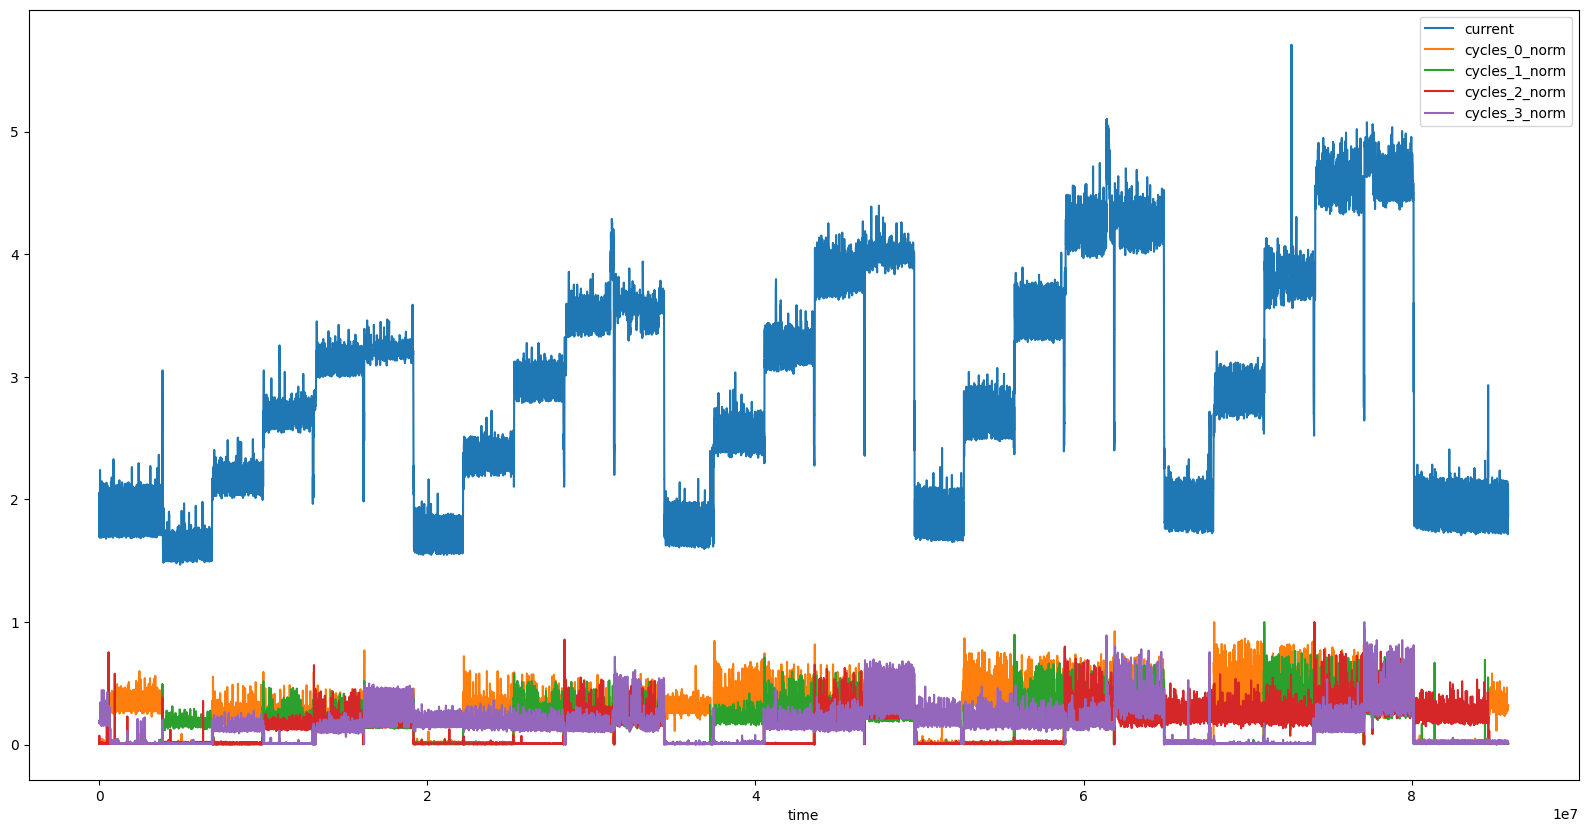

In [10]:
cpu_df['cycles_0_norm'] = min_max_scaling(cpu_df['insns_0'] / (cpu_df['time'] - cpu_df['time'].shift()))
cpu_df['cycles_1_norm'] = min_max_scaling(cpu_df['insns_1'] / (cpu_df['time'] - cpu_df['time'].shift()))
cpu_df['cycles_2_norm'] = min_max_scaling(cpu_df['insns_2'] / (cpu_df['time'] - cpu_df['time'].shift()))
cpu_df['cycles_3_norm'] = min_max_scaling(cpu_df['insns_3'] / (cpu_df['time'] - cpu_df['time'].shift()))

ax = cpu_df.plot(x='time', y=['current', 'cycles_0_norm', 'cycles_1_norm', 'cycles_2_norm', 'cycles_3_norm'], figsize=(20, 10))

In [12]:
mem_df = pd.read_csv('../results/numa-memcpy.csv')

mem_df['cache_hit_rate_0'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_0']) / mem_df['cache_hit_0']
mem_df['cache_hit_rate_1'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_1']) / mem_df['cache_hit_1']
mem_df['cache_hit_rate_2'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_2']) / mem_df['cache_hit_2']
mem_df['cache_hit_rate_3'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_3']) / mem_df['cache_hit_3']
mem_df['cache_hit_rate_avg'] = (mem_df['cache_hit_rate_0'] + mem_df['cache_hit_rate_1'] + mem_df['cache_hit_rate_2'] + mem_df['cache_hit_rate_3']) / 4

mem_df['br_miss_rate_0'] = mem_df['br_miss_0'] / mem_df['br_insns_0']
mem_df['br_miss_rate_1'] = mem_df['br_miss_1'] / mem_df['br_insns_1']
mem_df['br_miss_rate_2'] = mem_df['br_miss_2'] / mem_df['br_insns_2']
mem_df['br_miss_rate_3'] = mem_df['br_miss_3'] / mem_df['br_insns_3']
mem_df['br_miss_rate_avg'] = (mem_df['br_miss_rate_0'] + mem_df['br_miss_rate_1'] + mem_df['br_miss_rate_2'] + mem_df['br_miss_rate_3']) / 4

mem_df['clock_speed'] = (mem_df['insns_0'] + mem_df['insns_1'] + mem_df['insns_2'] + mem_df['insns_3']) / (mem_df['time'] - mem_df['time'].shift())
mem_df = mem_df.drop(index=0)

mem_df

,time,current,cpu_cycles_0,insns_0,cache_hit_0,cache_miss_0,br_insns_0,br_miss_0,bus_cycles_0,freq_0,...,cache_hit_rate_1,cache_hit_rate_2,cache_hit_rate_3,cache_hit_rate_avg,br_miss_rate_0,br_miss_rate_1,br_miss_rate_2,br_miss_rate_3,br_miss_rate_avg,clock_speed
1,3335,1.932,36152,16121,5850,56,1531,253,9508,700000,...,1.837701,1.846276,0.080062,1.188617,0.165251,0.145540,0.149758,0.069342,0.132473,87.098011
2,5317,1.932,33997,15669,5784,43,1505,232,8594,700000,...,1.800375,1.800062,0.080146,1.168287,0.154153,0.147105,0.136150,0.067267,0.126169,91.019173
3,7289,1.932,38319,17774,6625,44,1780,259,10850,700000,...,2.095178,2.062149,0.096577,1.311815,0.145506,0.138662,0.139280,0.064243,0.121923,91.265720
4,9291,1.564,38959,18659,6846,43,1873,273,11231,700000,...,2.133167,2.131834,0.099861,1.339645,0.145755,0.139280,0.137715,0.064538,0.121822,90.609391
5,11282,1.564,97227,39666,15932,583,4517,990,40205,700000,...,4.970937,5.084052,0.250926,2.817331,0.219172,0.136150,0.140323,0.063781,0.139857,102.797087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10706,21978047,1.576,31202,14547,5274,40,1276,163,6477,700000,...,0.047274,1.491622,1.490196,1.005377,0.127743,0.030559,0.131054,0.128205,0.104390,137.098840
10707,21980412,1.576,31259,14545,5275,43,1267,161,6559,700000,...,0.013477,1.490630,1.488782,0.996184,0.127072,0.059428,0.128023,0.128205,0.110682,192.444397
10708,21982397,1.576,31169,14547,5271,37,1273,159,6493,700000,...,0.045694,1.509635,1.489205,1.009378,0.124902,0.032921,0.125184,0.128205,0.102803,138.382368
10709,21984381,1.648,31240,15230,5321,38,1296,166,6540,700000,...,0.047563,1.504543,1.503552,1.012129,0.128086,0.030706,0.126781,0.126781,0.103088,137.125000


In [13]:
mem_df.drop('time', axis=1).corr()['current']

current               1.000000
cpu_cycles_0          0.921624
insns_0               0.843675
cache_hit_0           0.894578
cache_miss_0          0.505660
br_insns_0            0.788446
br_miss_0            -0.094107
bus_cycles_0          0.921743
freq_0                     NaN
cpu_cycles_1          0.425436
insns_1               0.326718
cache_hit_1           0.322477
cache_miss_1          0.241999
br_insns_1            0.353695
br_miss_1             0.234970
bus_cycles_1          0.423951
freq_1                     NaN
cpu_cycles_2         -0.300420
insns_2              -0.316438
cache_hit_2          -0.316701
cache_miss_2         -0.310899
br_insns_2           -0.322109
br_miss_2            -0.306567
bus_cycles_2         -0.311589
freq_2                     NaN
cpu_cycles_3         -0.029222
insns_3              -0.086262
cache_hit_3          -0.087868
cache_miss_3         -0.099886
br_insns_3           -0.106662
br_miss_3            -0.069463
bus_cycles_3         -0.056986
freq_3  

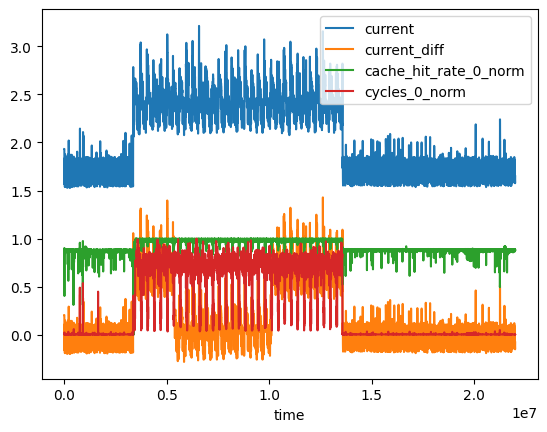

In [14]:
mem_df['cache_hit_rate_0_norm'] = min_max_scaling(mem_df['cache_hit_rate_0'])
mem_df['cycles_0_norm'] = min_max_scaling(mem_df['insns_0'] / (mem_df['time'] - mem_df['time'].shift()))
mem_df['current_diff'] = np.where((mem_df['time'] > 5350000) & (mem_df['time'] < 10100000),
                                   mem_df['current'] - 2.3588663400979706,
                                   mem_df['current'] - 1.7275771905424202)

ax = mem_df.plot(x='time', y=['current', 'current_diff', 'cache_hit_rate_0_norm', 'cycles_0_norm'])

(5000000.0, 11000000.0)

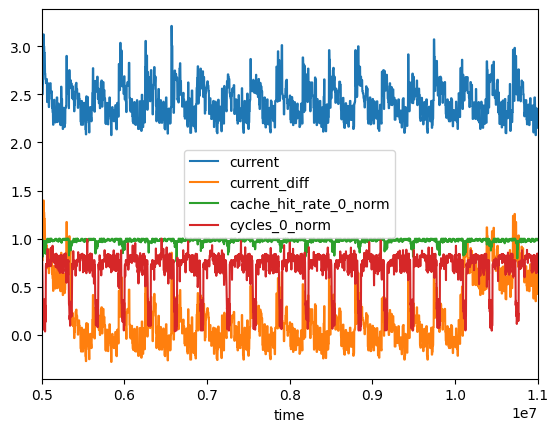

In [15]:
ax = mem_df.plot(x='time', y=['current', 'current_diff', 'cache_hit_rate_0_norm', 'cycles_0_norm'])
ax.set_xlim(5000000, 11000000)

In [16]:
mem_df = pd.read_csv('../results/numa-memrate.csv')

mem_df['cache_hit_rate_0'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_0']) / mem_df['cache_hit_0']
mem_df['cache_hit_rate_1'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_1']) / mem_df['cache_hit_1']
mem_df['cache_hit_rate_2'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_2']) / mem_df['cache_hit_2']
mem_df['cache_hit_rate_3'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_3']) / mem_df['cache_hit_3']
mem_df['cache_hit_rate_avg'] = (mem_df['cache_hit_rate_0'] + mem_df['cache_hit_rate_1'] + mem_df['cache_hit_rate_2'] + mem_df['cache_hit_rate_3']) / 4

mem_df['br_miss_rate_0'] = mem_df['br_miss_0'] / mem_df['br_insns_0']
mem_df['br_miss_rate_1'] = mem_df['br_miss_1'] / mem_df['br_insns_1']
mem_df['br_miss_rate_2'] = mem_df['br_miss_2'] / mem_df['br_insns_2']
mem_df['br_miss_rate_3'] = mem_df['br_miss_3'] / mem_df['br_insns_3']
mem_df['br_miss_rate_avg'] = (mem_df['br_miss_rate_0'] + mem_df['br_miss_rate_1'] + mem_df['br_miss_rate_2'] + mem_df['br_miss_rate_3']) / 4

mem_df['clock_speed'] = (mem_df['insns_0'] + mem_df['insns_1'] + mem_df['insns_2'] + mem_df['insns_3']) / (mem_df['time'] - mem_df['time'].shift())
mem_df = mem_df.drop(index=0)

mem_df

,time,current,cpu_cycles_0,insns_0,cache_hit_0,cache_miss_0,br_insns_0,br_miss_0,bus_cycles_0,freq_0,...,cache_hit_rate_1,cache_hit_rate_2,cache_hit_rate_3,cache_hit_rate_avg,br_miss_rate_0,br_miss_rate_1,br_miss_rate_2,br_miss_rate_3,br_miss_rate_avg,clock_speed
1,3368,1.932,41019,18872,6885,48,1889,310,11902,700000,...,0.062347,2.179797,2.167668,1.350710,0.164108,0.033074,0.143317,0.147335,0.121959,133.713043
2,5342,1.932,39038,18351,6845,43,1863,275,11108,700000,...,0.065335,2.132188,2.130978,1.330555,0.147611,0.032533,0.131455,0.137931,0.112383,136.435157
3,7328,1.932,38960,18251,6798,45,1849,282,11128,700000,...,0.064819,2.116490,2.144124,1.329703,0.152515,0.033623,0.136150,0.133550,0.113960,134.765358
4,9327,1.572,78764,29040,11831,303,2962,799,31031,700000,...,0.119092,2.066667,3.688750,1.712225,0.269750,0.038197,0.182655,0.144201,0.158701,142.602301
5,11312,1.572,97525,38172,15495,607,4349,993,40257,700000,...,0.164119,4.834114,4.831928,2.697747,0.228328,0.032410,0.134585,0.141066,0.134097,145.203023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8258,17055362,1.844,31331,14643,5302,37,1283,159,6558,700000,...,1.500142,1.499858,0.069943,1.015741,0.123928,0.132479,0.126781,0.060847,0.111009,93.914157
8259,17057355,1.844,31177,14643,5305,38,1288,160,6482,700000,...,1.500994,1.500284,0.071075,1.016297,0.124224,0.128023,0.126781,0.060612,0.109910,92.601104
8260,17059612,1.696,31408,15332,5353,42,1314,164,6669,700000,...,1.514205,1.391077,0.070040,0.991869,0.124810,0.133903,0.128713,0.064885,0.113078,84.078866
8261,17061599,1.696,31215,14642,5308,37,1287,158,6489,700000,...,1.502273,1.497734,0.071525,1.016140,0.122766,0.129630,0.127479,0.063981,0.110964,92.672874


In [17]:
mem_df.drop('time', axis=1).corr()['current']

current               1.000000
cpu_cycles_0          0.823642
insns_0               0.749878
cache_hit_0           0.801461
cache_miss_0          0.403932
br_insns_0            0.651427
br_miss_0             0.300938
bus_cycles_0          0.824206
freq_0                     NaN
cpu_cycles_1          0.346640
insns_1               0.262256
cache_hit_1           0.259576
cache_miss_1          0.234749
br_insns_1            0.274593
br_miss_1             0.226178
bus_cycles_1          0.344501
freq_1                     NaN
cpu_cycles_2          0.296548
insns_2               0.279805
cache_hit_2           0.284544
cache_miss_2          0.274753
br_insns_2            0.286349
br_miss_2             0.242668
bus_cycles_2          0.292220
freq_2                     NaN
cpu_cycles_3         -0.237007
insns_3              -0.258257
cache_hit_3          -0.259616
cache_miss_3         -0.280516
br_insns_3           -0.278630
br_miss_3            -0.246036
bus_cycles_3         -0.248301
freq_3  

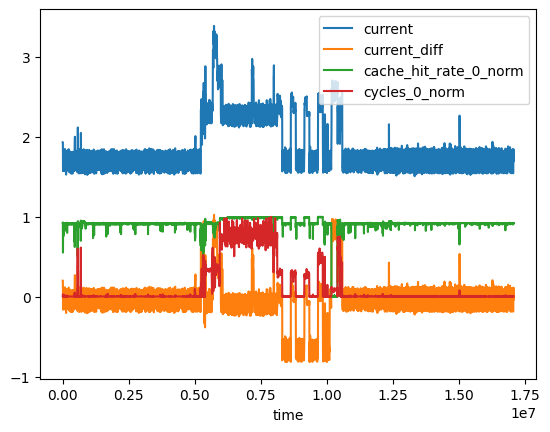

In [18]:
mem_df['cache_hit_rate_0_norm'] = min_max_scaling(mem_df['cache_hit_rate_0'])
mem_df['cycles_0_norm'] = min_max_scaling(mem_df['insns_0'] / (mem_df['time'] - mem_df['time'].shift()))
mem_df['current_diff'] = np.where((mem_df['time'] > 5350000) & (mem_df['time'] < 10100000),
                                   mem_df['current'] - 2.3588663400979706,
                                   mem_df['current'] - 1.7275771905424202)

ax = mem_df.plot(x='time', y=['current', 'current_diff', 'cache_hit_rate_0_norm', 'cycles_0_norm'])

(5000000.0, 11000000.0)

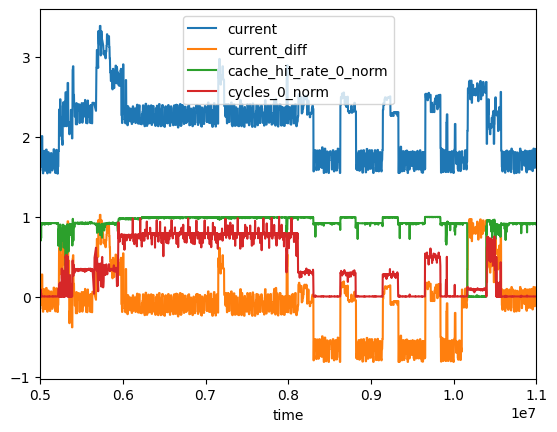

In [19]:
ax = mem_df.plot(x='time', y=['current', 'current_diff', 'cache_hit_rate_0_norm', 'cycles_0_norm'])
ax.set_xlim(5000000, 11000000)